In [20]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
titanic_df = sns.load_dataset('titanic')

In [23]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [25]:
categorical_cols = titanic_df.select_dtypes(exclude=np.number).columns.tolist()
print(categorical_cols)

['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [26]:
categorical_cols = ['sex', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
titanic_df[categorical_cols]

,sex,class,who,adult_male,deck,embark_town,alive,alone
0,male,Third,man,True,NaN,Southampton,no,False
1,female,First,woman,False,C,Cherbourg,yes,False
2,female,Third,woman,False,NaN,Southampton,yes,True
3,female,First,woman,False,C,Southampton,yes,False
4,male,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...
886,male,Second,man,True,NaN,Southampton,no,True
887,female,First,woman,False,B,Southampton,yes,True
888,female,Third,woman,False,NaN,Southampton,no,False
889,male,First,man,True,C,Cherbourg,yes,True


In [27]:
numerical_cols = titanic_df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [28]:
numerical_cols = ['age', 'sibsp', 'parch', 'fare']
titanic_df[numerical_cols]

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


In [29]:
titanic_df['age'] = titanic_df['age'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [30]:
titanic_df['age'].isnull().value_counts()

age
False    714
True     177
Name: count, dtype: int64

In [31]:
titanic_df[numerical_cols].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [32]:
titanic_df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [33]:
categorical_cols

['sex', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

In [34]:
titanic_df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [35]:
for col in categorical_cols:
    print('카운트::')
    print(titanic_df[col].value_counts())
    print('------------------------------')

카운트::
sex
male      577
female    314
Name: count, dtype: int64
------------------------------
카운트::
class
Third     491
First     216
Second    184
Name: count, dtype: int64
------------------------------
카운트::
who
man      537
woman    271
child     83
Name: count, dtype: int64
------------------------------
카운트::
adult_male
True     537
False    354
Name: count, dtype: int64
------------------------------
카운트::
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
------------------------------
카운트::
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
------------------------------
카운트::
alive
no     549
yes    342
Name: count, dtype: int64
------------------------------
카운트::
alone
True     537
False    354
Name: count, dtype: int64
------------------------------


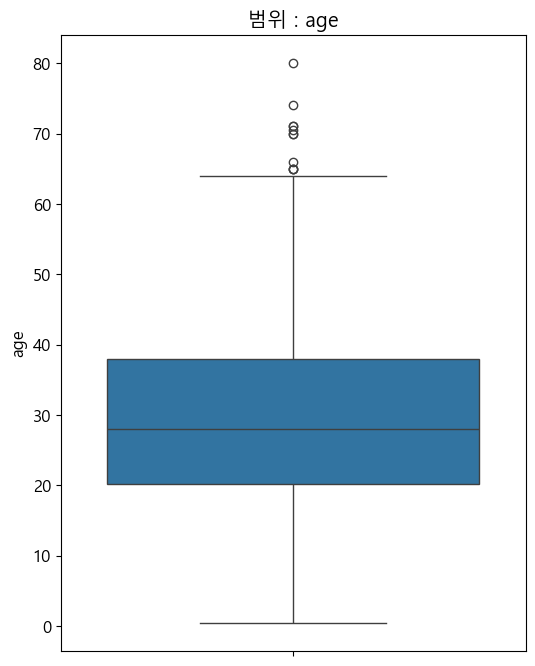

In [36]:
plt.figure(figsize=(6,8))
ax = sns.boxplot(data=titanic_df, y='age', showfliers=True)
ax.set_title('범위 : age')
plt.show()

In [38]:
numerical_cols

['age', 'sibsp', 'parch', 'fare']

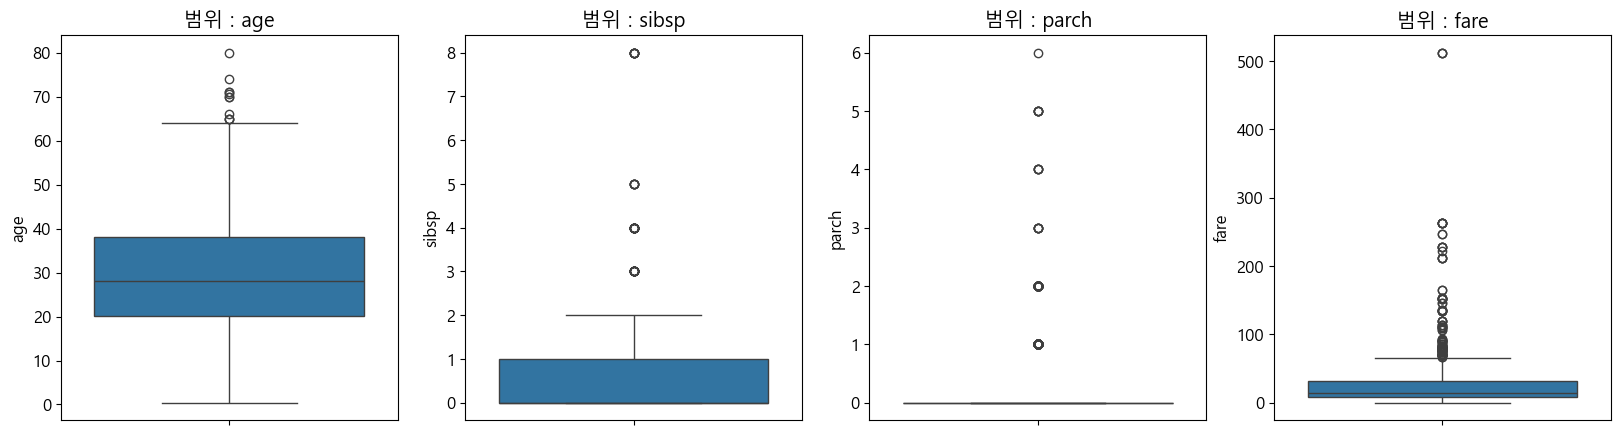

In [41]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,5)

for i in range(len(ax_list)):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df[numerical_cols], y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f'범위 : {col}')

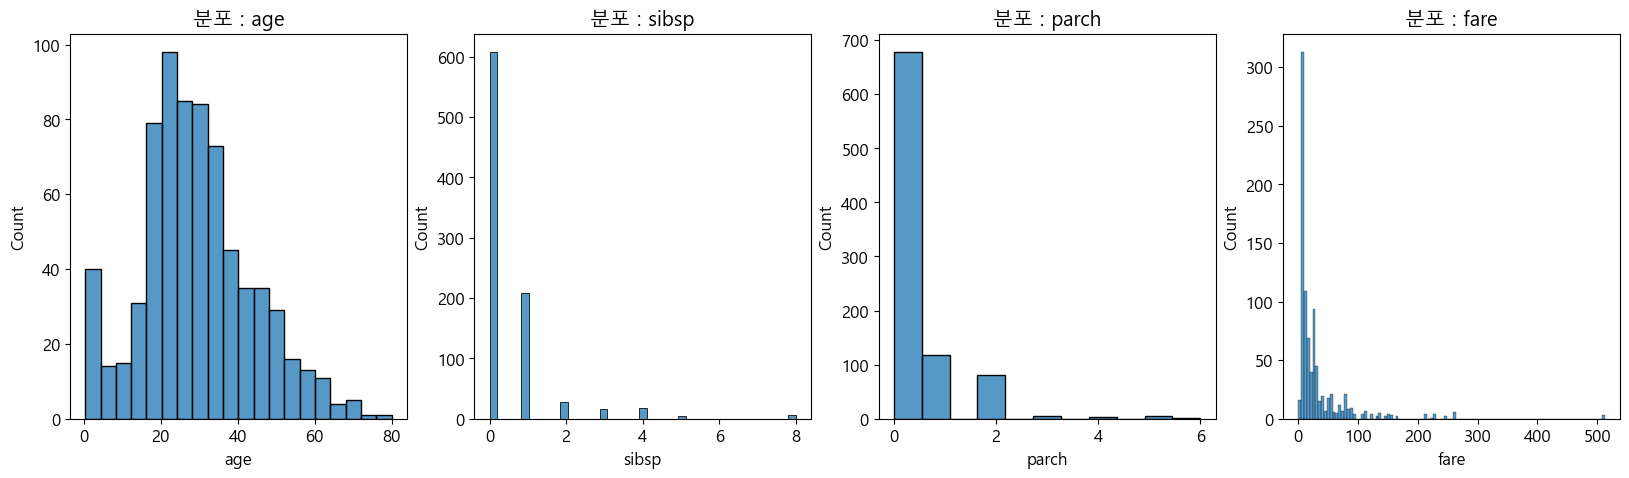

In [43]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,5)

for i in range(len(ax_list)):
    col = numerical_cols[i]
    sns.histplot(data=titanic_df, x=col, ax=ax_list[i])
    ax_list[i].set_title(f'분포 : {col}')

(3, 3)
(9,)


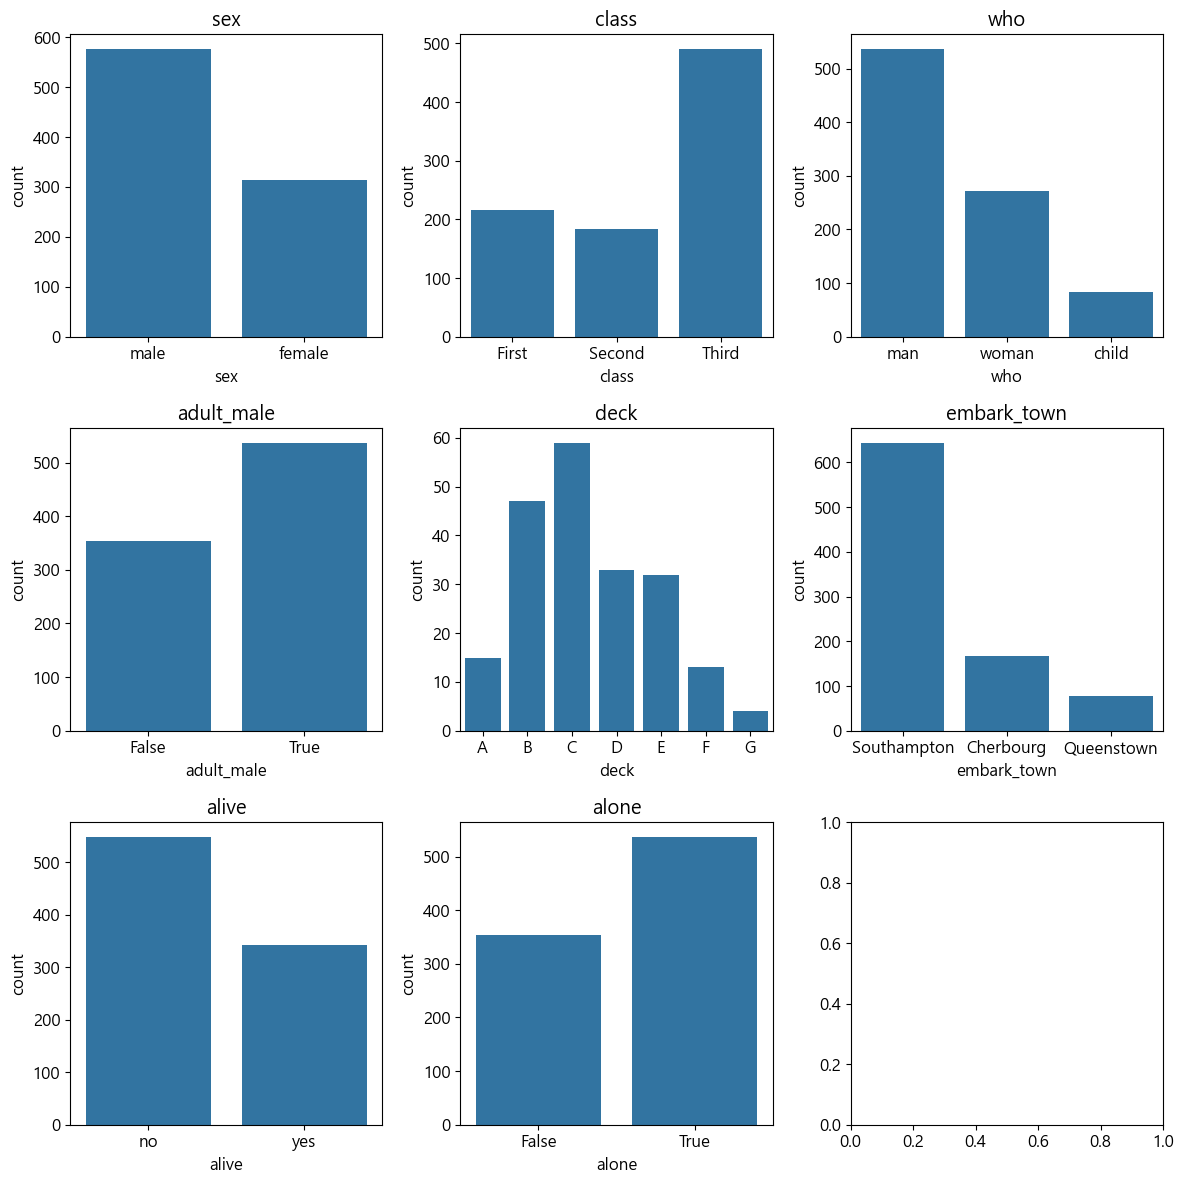

In [45]:
figure, ax_list = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(12,12)
ax_list2 = ax_list.reshape(3*3)

print(ax_list.shape)
print(ax_list2.shape)

for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    fig = sns.countplot(data=titanic_df, x=col, ax=ax_list2[i])
    fig.set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='sex', ylabel='count'>

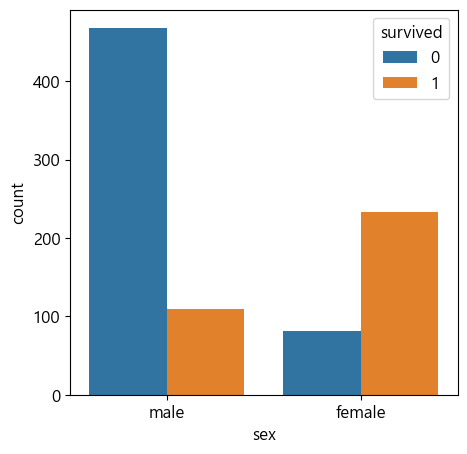

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_df, x='sex', hue='survived')

<Axes: xlabel='pclass', ylabel='count'>

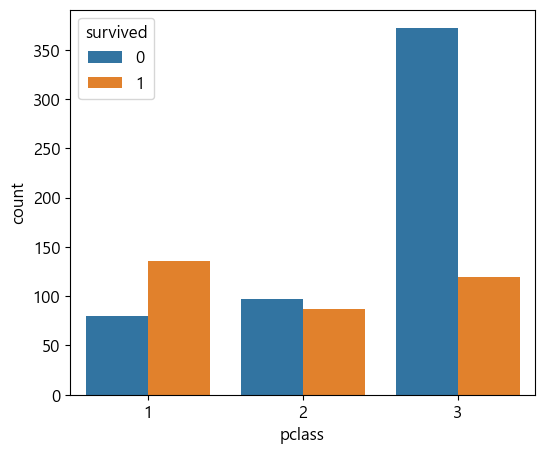

In [47]:
plt.figure(figsize=(6,5))
sns.countplot(data=titanic_df, x='pclass', hue='survived')

(3, 3)
(9,)


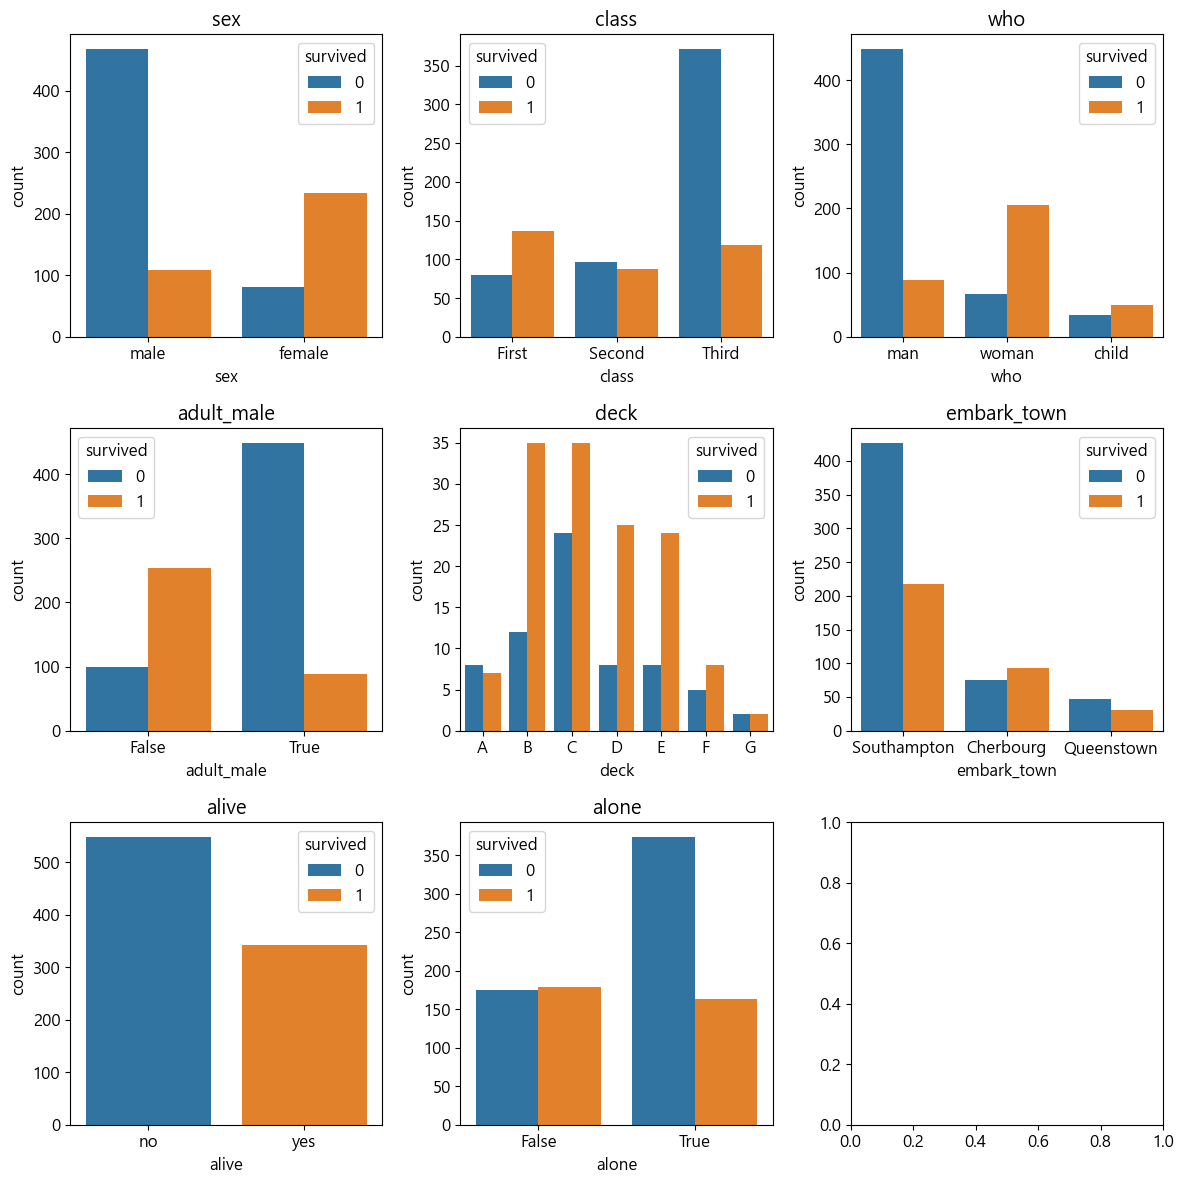

In [51]:
figure, ax_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(12,12)
ax_list2 = ax_list.reshape(3 * 3)  # 다차원 행렬의 1차원으로 변경, subplot지정을 index로 하기 위해
print(ax_list.shape)
print(ax_list2.shape)

for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    fig = sns.countplot(data=titanic_df, x=col, hue='survived', ax=ax_list2[i])
    fig.set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

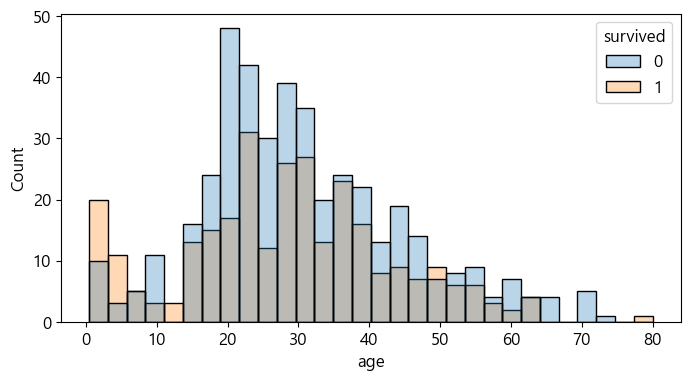

In [52]:
sns.histplot(data=titanic_df, x='age', hue='survived', bins=30, alpha=0.3)

<Axes: xlabel='sex', ylabel='age'>

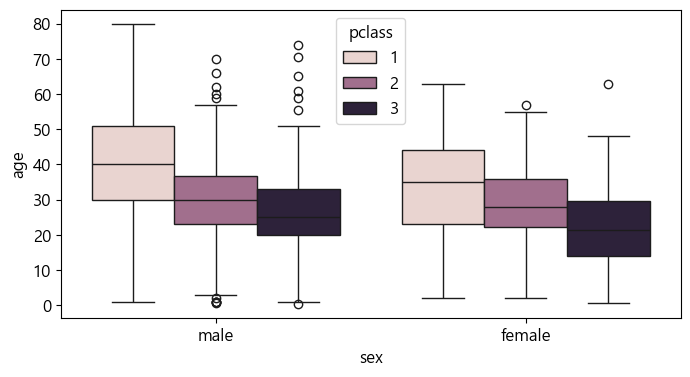

In [53]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass')

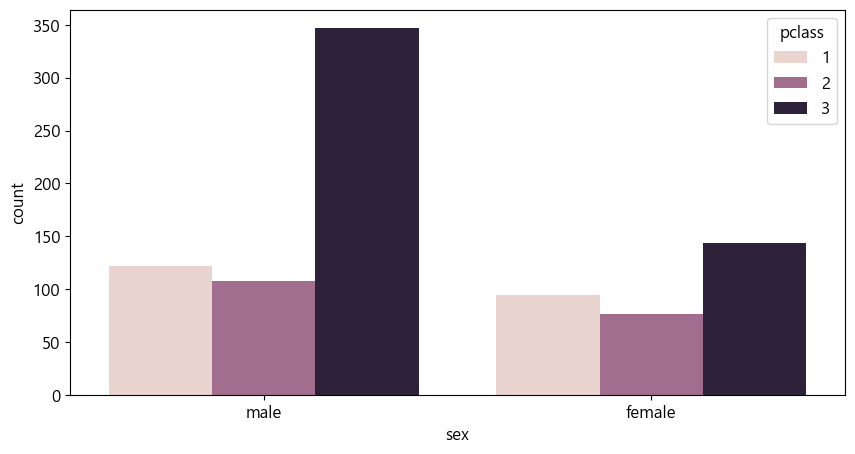

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(data=titanic_df, x='sex', hue='pclass')
plt.show()

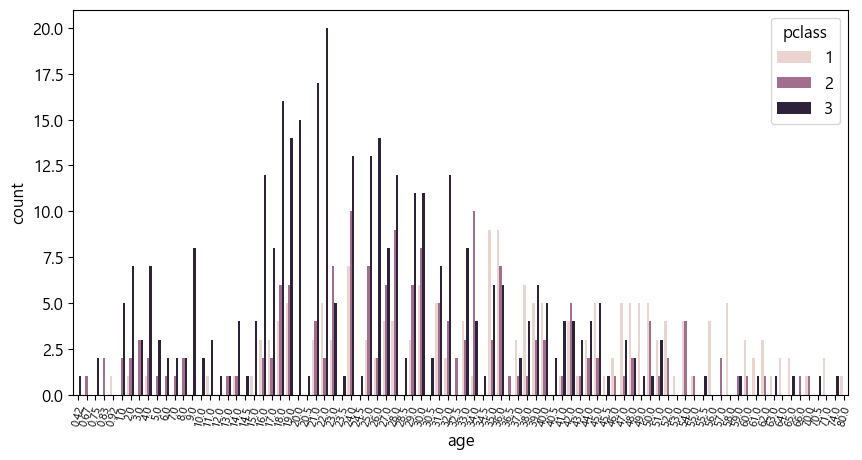

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(data=titanic_df, x='age', hue='pclass')
plt.xticks(rotation=75, fontsize=8)
plt.show()

In [56]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [57]:
titanic_df[numerical_cols].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [58]:
titanic_df[categorical_cols].describe()

,sex,class,who,adult_male,deck,embark_town,alive,alone
count,891,891,891,891,203,889,891,891
unique,2,3,3,2,7,3,2,2
top,male,Third,man,True,C,Southampton,no,True
freq,577,491,537,537,59,644,549,537


In [60]:
age_avg = titanic_df['age'].mean()
titanic_df['age'] = titanic_df['age'].fillna(age_avg)

In [62]:
titanic_df['deck'].describe()

count     203
unique      7
top         C
freq       59
Name: deck, dtype: object

In [63]:
titanic_df['deck'].fillna(titanic_df['deck'].describe()['top'], inplace=True)

In [64]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [68]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [72]:
drop_cols = ["class", "embark_town", "alive"]

titanic_df_clean = titanic_df.drop(["class", "embark_town", "alive"], axis=1)

titanic_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
 10  deck        891 non-null    category
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
encoding_cols = titanic_df_clean.select_dtypes(exclude=np.number)

for col in encoding_cols:
    titanic_df_clean[col] = le.fit(titanic_df_clean[col]).transform(titanic_df_clean[col])

In [79]:
titanic_df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.0,1,0,53.1000,2,2,0,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,1


In [80]:
titanic_df_clean['age'] = titanic_df_clean['age'].astype(int)
titanic_df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22,1,0,7.2500,2,1,1,2,0
1,1,1,0,38,1,0,71.2833,0,2,0,2,0
2,1,3,0,26,0,0,7.9250,2,2,0,2,1
3,1,1,0,35,1,0,53.1000,2,2,0,2,0
4,0,3,1,35,0,0,8.0500,2,1,1,2,1


In [81]:
import os
if not os.path.exists('ml_datas'):
    os.mkdir('ml_datas')

titanic_df_clean.to_csv('ml_datas/titanic_df_clean.csv', index=False)

In [82]:
titanic_df_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

In [83]:
X = titanic_df_clean[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked', 'who', 'adult_male', 'deck', 'alone']]
y = titanic_df_clean['survived']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [85]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)

In [86]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

In [88]:
print('예측 정확도: %.2f' % accuracy_score(y_test, y_pred))

예측 정확도: 0.78


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       111
           1       0.73      0.66      0.69        68

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [91]:
# precision : 실제 True인 값의 비율
# Recall : 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
# Precision-Recall Trade-off : 둘의 조화 평균

In [92]:
pd.crosstab(y_test, y_pred)

col_0,0,1
survived,,
0,94,23
1,17,45


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[94, 23],
       [17, 45]])